## Observations and Insights 

In [27]:
#observations and inferences
import os 

print("Pymaceuticals Analysis")
    
print("-------------------------")
print(f"Capomulin is the most popular drug regimen among the mice tested." )
print(f"Ramicane was the most succesful drug treatment in reducing tumor size.")
print(f"While using Capomulin, tumor volume increased with average weight of mice.")

#write out observations/inferences into text file
analysis = os.path.join("Analysis", "Pymaceuticals_Analysis.txt")
with open(analysis,"w") as file:

    file.write("Pymaceuticals Analysis")
    file.write("\n")
    file.write("-------------------------")
    file.write("\n")
    file.write(f"Capomulin is the most popular drug regimen among the mice tested." )
    file.write("\n")
    file.write(f"Ramicane was the most succesful drug treatment in reducing tumor size.")
    file.write("\n")
    file.write(f"While using Capomulin, tumor volume increased with average weight of mice.")

Pymaceuticals Analysis
-------------------------
Capomulin is the most popular drug regimen among the mice tested.
Ramicane was the most succesful drug treatment in reducing tumor size.
While using Capomulin, tumor volume increased with average weight of mice.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
#number of unique mouse IDs 
len(complete_data["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 
duplicate = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
len(duplicate)


5

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#show 5 duplicate rows
duplicate
show_duplicates = complete_data[complete_data.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = complete_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the clean DataFrame.
#new number of rows
print(len(cleandata))
#number of unique Mouse IDs
print(len(cleandata["Mouse ID"].unique()))

1888
249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
#group by regimen 
drug_reg = cleandata.groupby(["Drug Regimen"])
#retrieve mean
tumormean = drug_reg["Tumor Volume (mm3)"].mean()
#retrieve median
tumormedian = drug_reg["Tumor Volume (mm3)"].median()
#retrieve variance
tumorvariance = drug_reg["Tumor Volume (mm3)"].var()
#retrieve std deviation
tumorstd = drug_reg["Tumor Volume (mm3)"].std()
#retrieve SEM
tumorsem = drug_reg["Tumor Volume (mm3)"].sem()

#create dataframe
tumor_summary = pd.DataFrame({ "Mean Tumor Volume": tumormean, 
                                    "Median Tumor Volume": tumormedian, 
                                    "Variance Tumor Volume": tumorvariance, 
                                    "Standard Deviation Tumor Volume": tumorstd,
                                     "SEM Tumor Volume": tumorsem
    
    
})
tumor_summary


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#aggregate summ stats
tumor_summary_single = drug_reg["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

#create table, renaming columns
tumor_summary_single = tumor_summary_single.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance Tumor Volume",
                                                   "std":"Standard Dev Tumor Volume ", 
                                                   "sem":"SEM Tumor Volume"})

tumor_summary_single

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Treated')

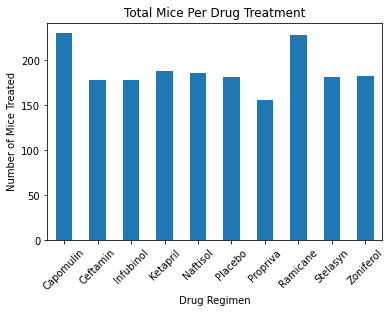

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
micetimepoints = cleandata.groupby(["Drug Regimen"]).count()["Mouse ID"]
#dataframe.plot
barpandas = micetimepoints.plot.bar(x='Drug Regimen', y='Mouse ID', rot=45)
plt.title("Total Mice Per Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")

<function matplotlib.pyplot.show(close=None, block=None)>

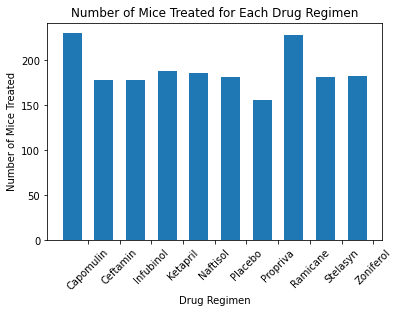

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#plt.bar(micetimepoints["Drug Regimen"], micetimepoints["Mouse ID"])
#arange because "drug regimen" is not a column 
xaxis = np.arange(len(micetimepoints))
yaxis = micetimepoints
#pyplot 
plt.bar(xaxis,yaxis,width=0.6,align="center")
#make ticks
ticks = [value+0.5 for value in xaxis]
plt.xticks(ticks, micetimepoints.index.values, rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")
plt.title("Number of Mice Treated for Each Drug Regimen")
#display plot
plt.show

<AxesSubplot:title={'center':'Sex Distribution Among Mice Treated'}>

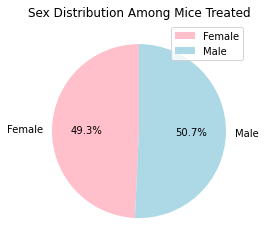

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
micegender = cleandata.groupby(["Sex"]).count()
micegender
#dataframe.plot
piepandas = micegender.plot.pie(y="Mouse ID", title=("Sex Distribution Among Mice Treated"), colors = ["pink","lightblue"],startangle=90,autopct='%1.1f%%')
#remove Mice ID label 
piepandas.set_ylabel("")
#display plot
piepandas


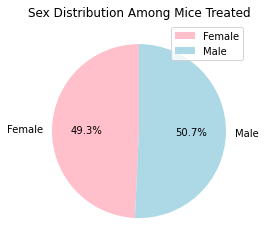

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#pyplot
micegender
labels = ["Female", "Male"]
colors = ["pink", "lightblue"]

plt.pie(micegender["Mouse ID"], labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title("Sex Distribution Among Mice Treated")
plt.legend(labels, loc="best")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#group by ID & final timepoint
finalvol = cleandata.groupby(["Mouse ID"])["Timepoint"].max()
finalvol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalvolmerged = pd.merge(finalvol, cleandata, on=(["Mouse ID", "Timepoint"]))
finalvolmerged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [65]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #loc for each time drug is counted and tumor volumes that correlate
    tumorvolume = finalvolmerged.loc[finalvolmerged["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

    
    
#print outlier results
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 are outliers.


([<matplotlib.axis.XTick at 0x16197e4b2b0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

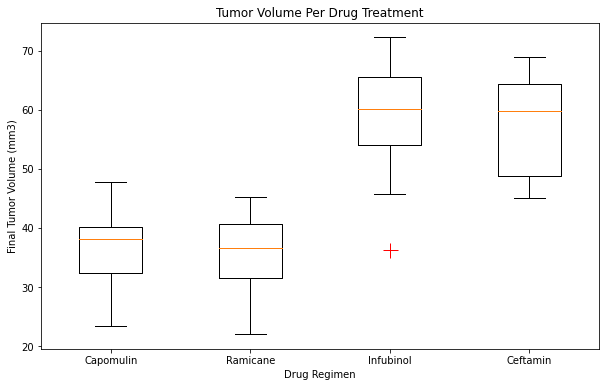

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots(figsize=(10,6))
#custom marker
flierprops = dict(marker='+', markerfacecolor='g', markersize=15,
                  linestyle='none', markeredgecolor='r')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)
#set labels 
ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
#label ticks
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


## Line and Scatter Plots

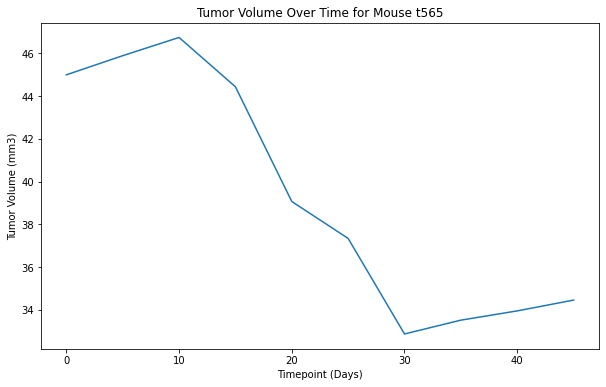

In [20]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
#isolate Capomulin treatment data 
#view data to choose a mouse
cap_treatment = cleandata.loc[cleandata["Drug Regimen"] == "Capomulin"]
cap_treatment.value_counts("Mouse ID")

#choose mouse t565 and isolate her data
t565 = cleandata.loc[cleandata["Mouse ID"] == "t565"]
t565

fig1,ax1 = plt.subplots(figsize=(10,6))
#make x & y axes
cap_xaxis = t565["Timepoint"]
cap_yaxis = t565["Tumor Volume (mm3)"]
plt.plot(cap_xaxis, cap_yaxis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse t565")
plt.show()

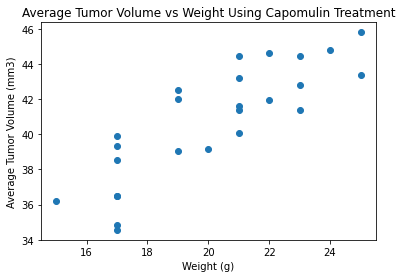

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#get avg from grouped data
avg_cap_weight = cap_treatment.groupby(["Mouse ID"]).mean()
plt.scatter(avg_cap_weight['Weight (g)'], avg_cap_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.841936342469472
y = 0.95x + 21.55


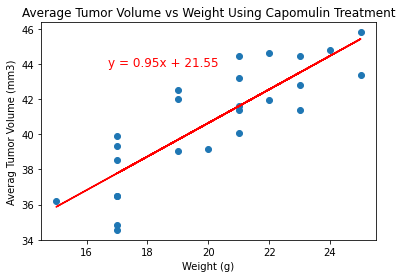

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#find correlation coefficient & print it out
corcoef = st.pearsonr(avg_cap_weight['Weight (g)'], avg_cap_weight['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {corcoef}")

#make scatter plot
plt.scatter(avg_cap_weight['Weight (g)'],avg_cap_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

#variables for lin regression 
lin_x_values = avg_cap_weight['Weight (g)']
lin_y_values = avg_cap_weight['Tumor Volume (mm3)']

#develop equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lin_x_values, lin_y_values)
regress_values = lin_x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)

#add equation & line onto plot
plt.annotate(equation, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=12,color="red")
plt.plot(lin_x_values,regress_values,"r-")
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
plt.show()

In [ ]:
#no author, GitHub user content source code [Python]. https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=e87e9f7e6c430de634a828c96791aa023526a013&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d67656666726f792f4d6174706c6f746c69622d486f6d65776f726b2f653837653966376536633433306465363334613832386339363739316161303233353236613031332f6d61696e5f70796d61636575746963616c732e6970796e62&logged_in=false&nwo=mgeffroy%2FMatplotlib-Homework&path=main_pymaceuticals.ipynb&platform=android&repository_id=358480816&repository_type=Repository&version=99
#used this code to reference linear regression 